# L03-Assignment
## Assignment Instructions

* Complete all cells as instructed, replacing any ??? with the appropriate code

* Execute Jupyter **Kernel** > **Restart & Run All** and ensure that all code blocks run without error

* Do not load any additional libraries. You must use the libraries in the Load Libraries cell provided.

* Meet all of the assignment objectives described below

* Jupyter Notebook cells can be added and inserted as desired

# Assignment objectives

Analyze the sales of houses. This includes:

* 1 point - All code blocks run without error. Jupyter **Kernel** > **Restart & Run All**
* 1 point - Create 3 ggplot charts
* 1 point - Include the following R Features at least once. You are not limited to these, only by the libraries loaded.
* 1 point - Include a written analysis of interesting patterns in house sales referencing the charts as evidence of your conclusions.

The above is what is required to achieve full credit for the assignment. You are welcome and encouraged to go above and beyond these requirements, just be sure these requirements are fully met first. 


## R Features
* as.factor()
* as.integer()
* as.double()
* labs()
* %>% pipe
* Map data to color
* A chart includes a categorical variable


## Datasets
* house_listings

In [1]:
# Load libraries
# Do not load any additional libraries other than what is provided in this template
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.2.5
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# House Listings

* city: Name of MLS area
* sales: Number of sales
* volume: Total value of sales
* median: Median sale price
* listings: Total active listings
* inventory: "Months inventory": amount of time it would take to sell all current listings at current pace of sales.

In [2]:
# Explore data structure
# Data: house_listings

load("house_listings.RData")

house_listings %>% glimpse()

Observations: 1,000
Variables: 8
$ city      <chr> "Montgomery County", "Lubbock", "Corpus Christi", "Lufkin",…
$ year      <chr> "2008", "2014", "2002", "2013", "2012", "2006", "2008", "20…
$ month     <chr> "7", "1", "11", "4", "12", "12", "4", "2", "7", "7", "4", "…
$ sales     <chr> "655", "221", "275", "73", "563", "87", "164", "499", "152"…
$ volume    <chr> "164320930", "33705478", "31335000", "11580743", "118842450…
$ median    <chr> "175500", "124300", "95600", "141200", "177500", "99300", "…
$ listings  <chr> "4099", "774", "1530", "404", "1546", "309", "976", "2377",…
$ inventory <chr> "6.8", "2.3", "4.9", "8.5", "2.4", "3.7", "7.1", "3.9", "6.…


# Data processing
Create a new data frame(s) with appropriate data types and data cleaning for the data.

In [3]:
#Converting the the data to the appropriate data types

df <- house_listings  %>% 
  mutate(year = as.factor(year), 
         month = as.integer(month),
         sales = as.integer(sales),
         volume = as.integer(volume),
         median = as.integer(median),
         listings = as.integer(listings),
         inventory = as.double(inventory))

#Removing all the nulls in the dataset 
df <- df  %>% drop_na() 
df %>% glimpse
df %>% summary()

Warning message:
“NAs introduced by coercion to integer range”

Observations: 821
Variables: 8
$ city      <chr> "Montgomery County", "Lubbock", "Corpus Christi", "Lufkin",…
$ year      <fct> 2008, 2014, 2002, 2013, 2012, 2006, 2008, 2014, 2000, 2003,…
$ month     <int> 7, 1, 11, 4, 12, 12, 4, 2, 7, 7, 4, 3, 10, 3, 5, 5, 2, 3, 6…
$ sales     <int> 655, 221, 275, 73, 563, 87, 164, 499, 152, 606, 914, 210, 2…
$ volume    <int> 164320930, 33705478, 31335000, 11580743, 118842450, 1105000…
$ median    <int> 175500, 124300, 95600, 141200, 177500, 99300, 166200, 17280…
$ listings  <int> 4099, 774, 1530, 404, 1546, 309, 976, 2377, 742, 3777, 5742…
$ inventory <dbl> 6.8, 2.3, 4.9, 8.5, 2.4, 3.7, 7.1, 3.9, 6.2, 8.7, 6.0, 7.6,…


     city                year         month            sales       
 Length:821         2014   : 71   Min.   : 1.000   Min.   :   6.0  
 Class :character   2012   : 66   1st Qu.: 3.000   1st Qu.:  95.0  
 Mode  :character   2010   : 63   Median : 6.000   Median : 183.0  
                    2011   : 62   Mean   : 6.313   Mean   : 588.5  
                    2008   : 58   3rd Qu.: 9.000   3rd Qu.: 503.0  
                    2013   : 58   Max.   :12.000   Max.   :7935.0  
                    (Other):443                                    
     volume              median          listings       inventory     
 Min.   :1.157e+06   Min.   : 55000   Min.   :  108   Min.   : 1.300  
 1st Qu.:1.223e+07   1st Qu.:101400   1st Qu.:  700   1st Qu.: 4.800  
 Median :2.622e+07   Median :128400   Median : 1280   Median : 6.300  
 Mean   :1.155e+08   Mean   :131747   Mean   : 3158   Mean   : 7.283  
 3rd Qu.:8.750e+07   3rd Qu.:153100   3rd Qu.: 2873   3rd Qu.: 8.100  
 Max.   :2.074e+09   Max.   :2

# Relationship between Sales and Listings
There is a direct relationship between sales and listings for 2015

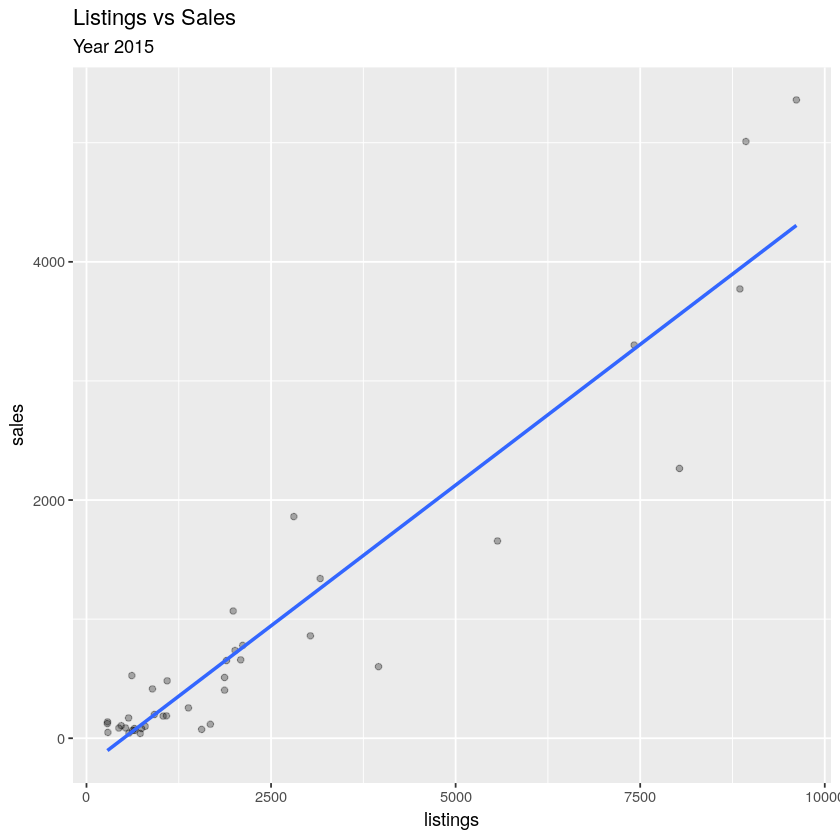

In [4]:
#Filter 2015 to show the relationship between sales and listings 

df2015 <- df %>% filter(year ==2015)

df2015 %>% 
ggplot(aes(x = listings, y = sales)) + 
   geom_jitter(alpha = 0.3) +
   geom_smooth(se = FALSE, method = 'lm') +
    labs(title = "Listings vs Sales", subtitle = "Year 2015")


# Volume Per Listings
This chart shows that 2013 and 2014 had the most number of sales per listing from 2000 to 2015.

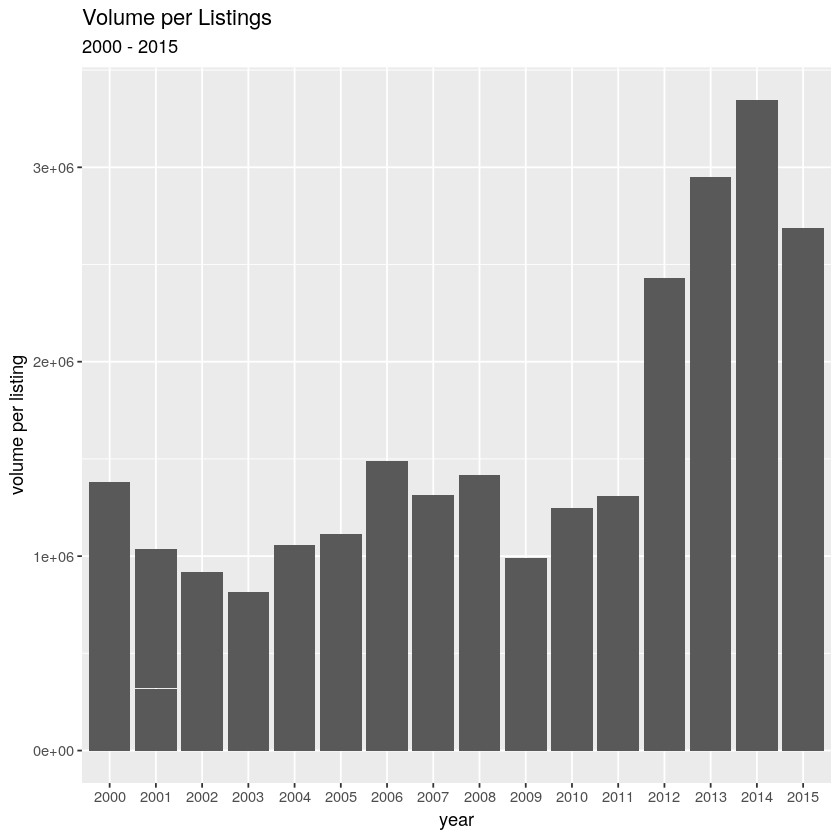

In [5]:
#I would like to see what year has the most number of volume per listing
df <- df %>% 
    mutate(vpl = volume/listings)

df %>% 
ggplot(aes(year, vpl)) +
    geom_col() +
    labs(title = "Volume per Listings", subtitle = "2000 - 2015") +
    ylab("volume per listing")
   

# Top 5 Cities with the Most in Demand Houses


In [6]:
# I would like to know what cities had the most in demand houses by looking at the inventory column
# I'm going to use 2014 since it has the highest volume per listing

df_top <- df %>% 
    filter(year == 2014) %>% 
    arrange(desc(inventory))
df_top  %>% head(15)

# It looks like South Padre Island, Harlingen, Kerrville, Brownsville, and Texarkana has the highest turnover rate.
# I'm going to filter out these cities and convert them to factors

df_city <- df  %>% 
    filter(city %in% c("South Padre Island", "Harlingen", "Kerrville", "Brownsville", "Texarkana")) %>% 
    mutate(city = as.factor(city))


city,year,month,sales,volume,median,listings,inventory,vpl
<chr>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
South Padre Island,2014,1,24,5286750,160000,764,23.2,6919.830
South Padre Island,2014,4,33,5295900,110000,763,22.5,6940.891
Harlingen,2014,11,73,8407329,94200,1667,20.4,5043.389
Harlingen,2014,12,87,13124926,117300,1540,18.5,8522.679
Kerrville,2014,7,68,14305315,172000,718,13.6,19923.837
Brownsville,2014,4,70,8181025,111400,806,12.5,10150.155
Brownsville,2014,3,68,7819949,102700,786,12.2,9949.045
Kerrville,2014,12,58,12226683,185700,626,11.5,19531.442
Nacogdoches,2014,7,45,7098950,162500,292,11.0,24311.473


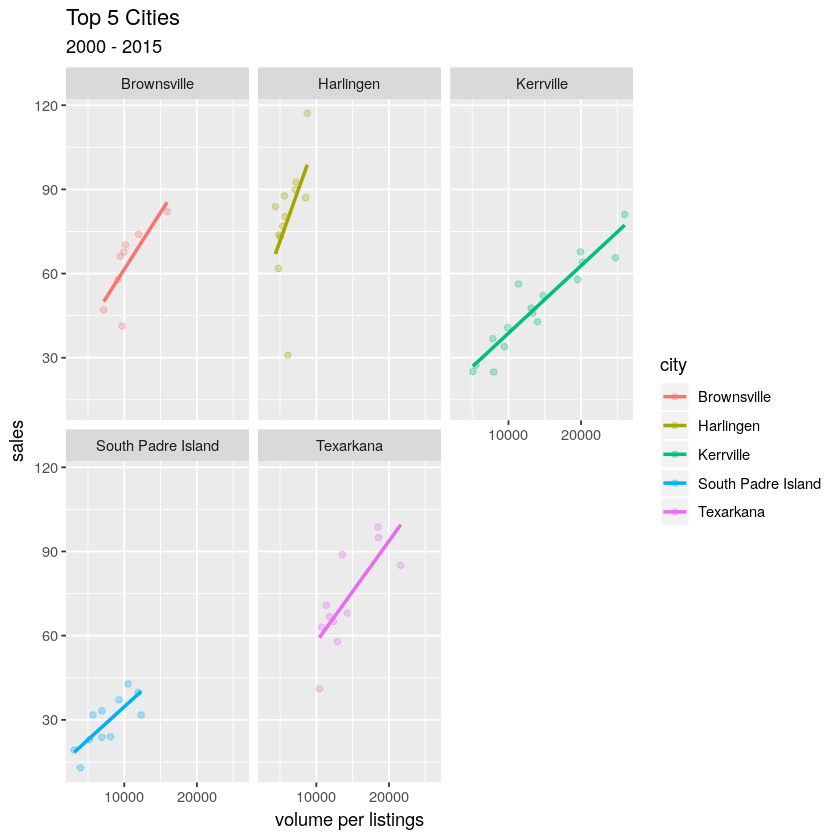

In [7]:
df_city %>% 
ggplot(aes(x = vpl, y = sales, color = city)) + 
   geom_jitter(alpha = 0.3) +
   geom_smooth(se = FALSE, method = 'lm') +
    facet_wrap( ~ city) +
    labs(title = "Top 5 Cities", subtitle = "2000 - 2015") +
    xlab("volume per listings")

# Analysis and Conclusions
Using the data set, I found out that listings and sales have a positive relationship for 2015, as shown in the first graph. This relationship means that as listings go up, sales also increase. The volume per listing has been steadily increasing from 2000 to 2015. It reached its highest by 2014 with a little bit of slow down by 2015. Since 2014 has shown the highest volume per listings, I want to see what cities this year have the highest demand (using inventory as a measurement). South Padre Island, Harlingen, Kerrville, Brownsville, and Texarkana have the highest turnover at around 10% to 30%. These five cities also show that there's a positive relationship between sales and volume per listing.